# Titanic dataset - machine learning

Load the Titanic.csv file into Google Colab by clicking on the folder icon on the left of this screen. Then click on the upload symbol, find where you saved the file and upload it so that you can use it.

Objective of this project is to predict if a passenger on the Titanic would have survived or not.

In [1]:
#load packages needed to run the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#import csv file

df = pd.read_csv('Titanic.csv', sep=',', na_values='unknown') #reads in the csv file
df.head(10) #shows the first 10 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
## statistical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
## datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA



Some visualisations of the data to interpret. There are others you could also include. Summarise the key findings, insights, and potential areas for further investigation. This could include patterns, trends, outliers, or relationships observed during the analysis.

<Axes: xlabel='Survived', ylabel='count'>

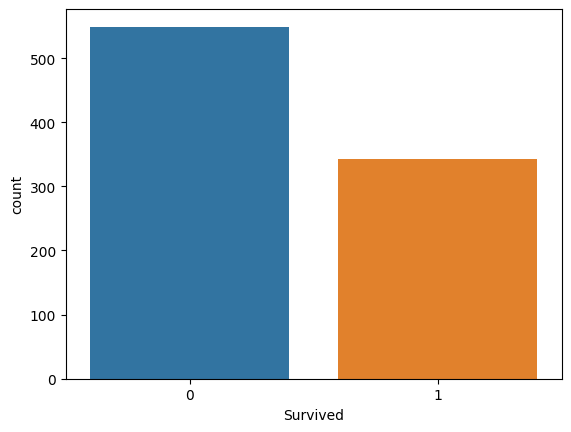

In [5]:
## categorical attributes

sns.countplot(x ='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

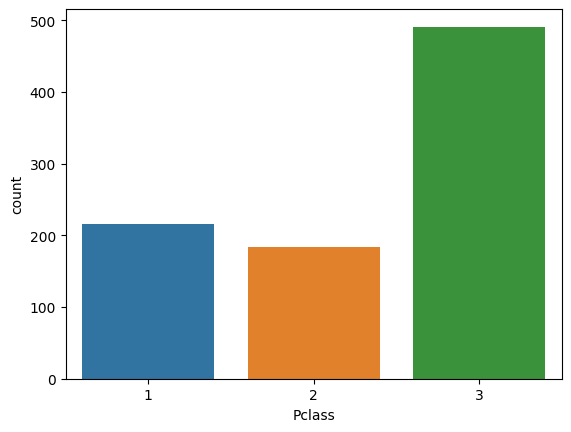

In [6]:
sns.countplot(x ='Pclass', data=df)

<Axes: xlabel='Sex', ylabel='count'>

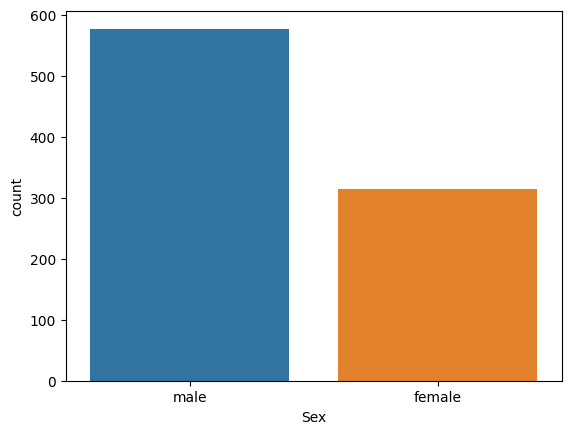

In [7]:
sns.countplot(x ='Sex', data=df)

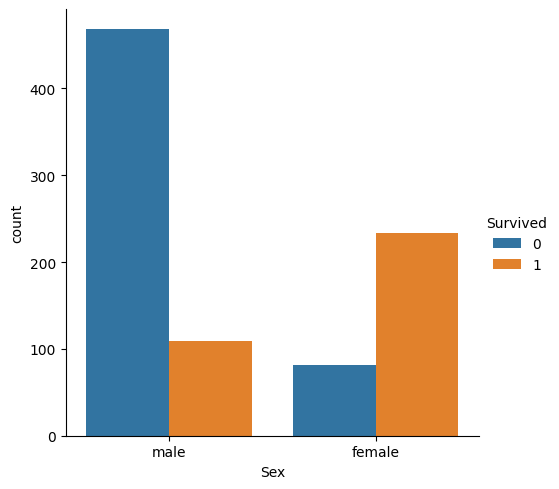

In [8]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

<Axes: xlabel='Embarked', ylabel='count'>

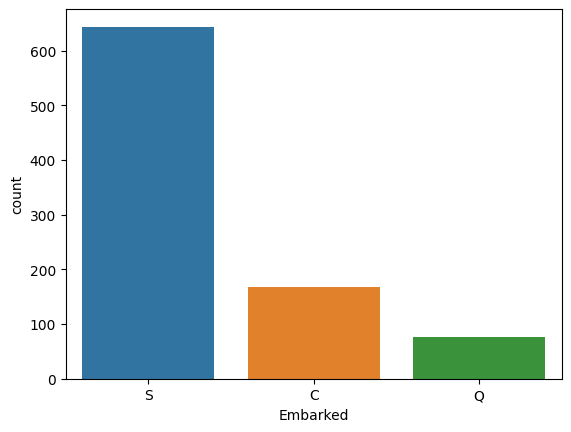

In [9]:
sns.countplot(x ='Embarked', data=df)

<Axes: xlabel='Parch', ylabel='count'>

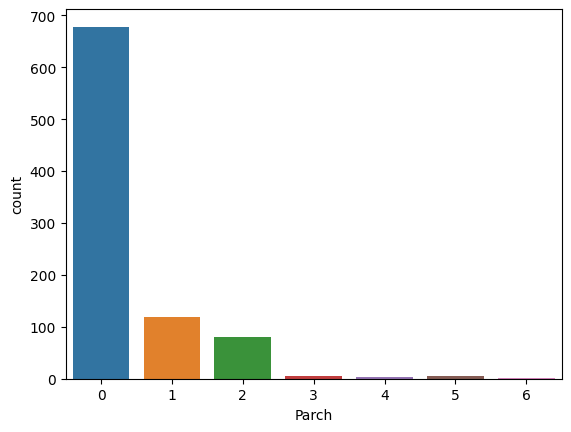

In [10]:
sns.countplot(x ='Parch', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

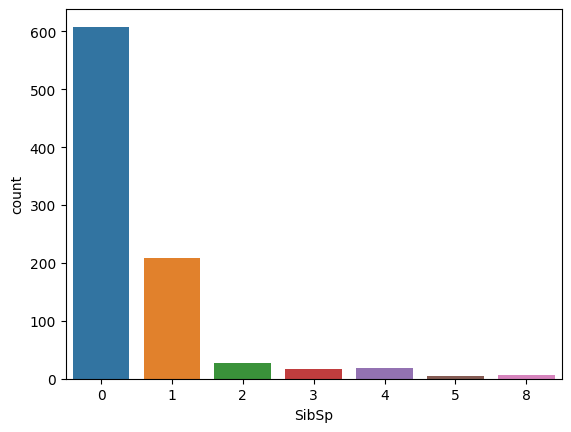

In [11]:
sns.countplot(x ='SibSp', data=df) #0 = travelled alone

<Axes: xlabel='Age', ylabel='Density'>

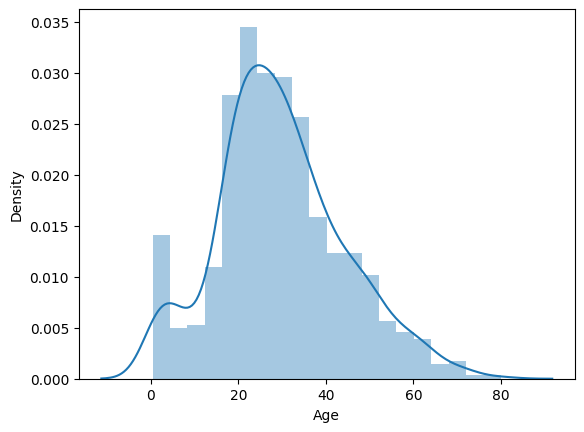

In [12]:
## numerical attributes
sns.distplot(df['Age']) # looks almost normally distributed

<Axes: xlabel='Fare', ylabel='Density'>

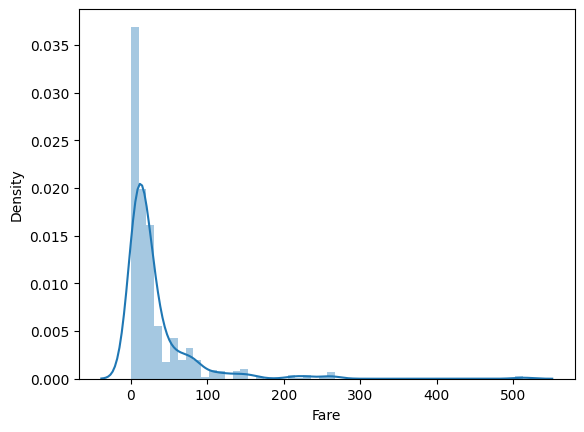

In [13]:
sns.distplot(df['Fare']) #shows non normal distribution
#has high number of 0 fares

<Axes: xlabel='Pclass', ylabel='Fare'>

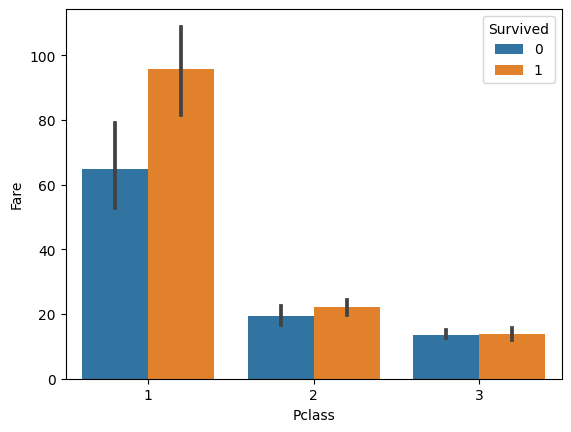

In [14]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

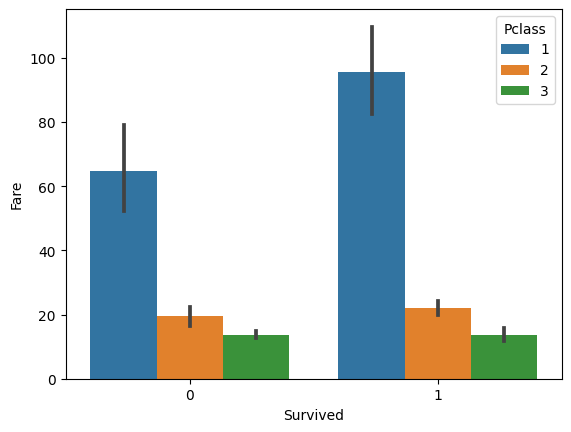

In [15]:
sns.barplot(data=df, x='Survived', y='Fare', hue='Pclass')

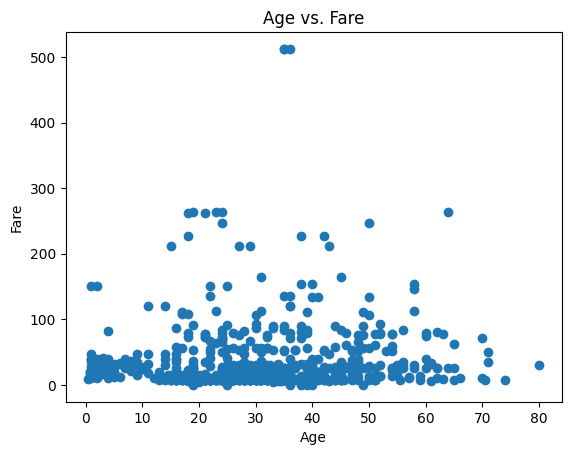

In [16]:
# Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

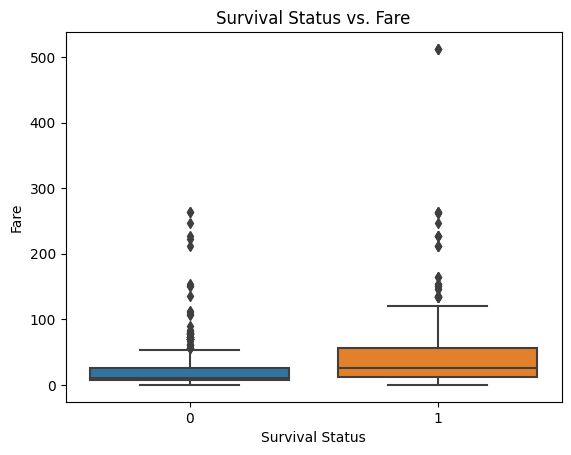

In [18]:
# Box plot
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

The box plot shows some possible outliers

In [19]:
# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


In [20]:
# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


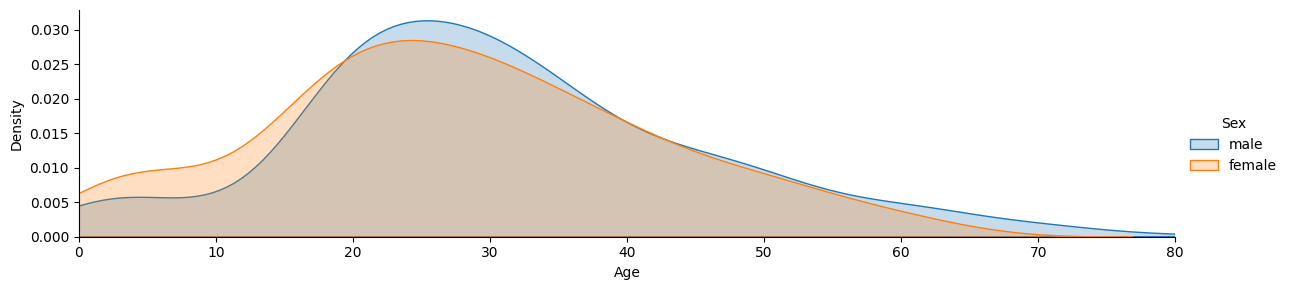

In [21]:
#Visualize the data using FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

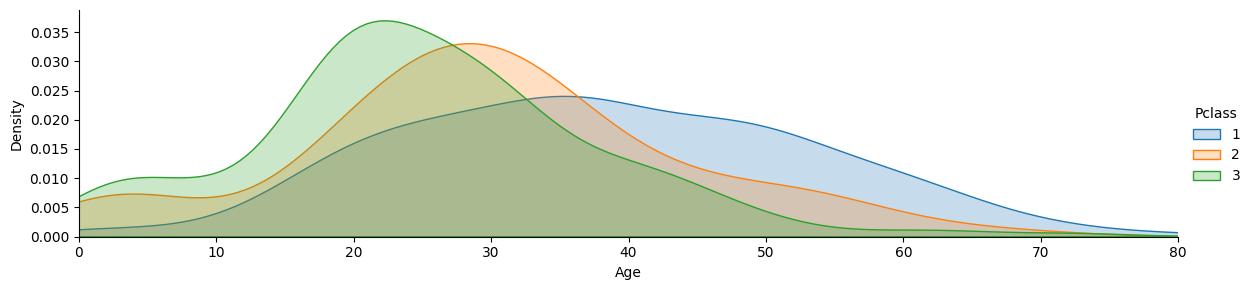

In [22]:
#same for class by changing the hue argument:
fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

# Pre-processing

In [23]:
#check for any duplicates
print('df - Number of duplicate Record:', df.duplicated().sum())

df - Number of duplicate Record: 0


In [24]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
#age has 177 missing values. One method to fill missing values is using the average of the ages. Might not be the best way.

#df['Age'].mean()  # can use this code to check the average it's 30 years old

# fill missing values using mean of the numerical age column
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [26]:
#embarked has 2 missing values. This is a categorical value so can use the mode to fill in missing value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:
#lots of cabin values are missing and possibly not that useful to include in model. Suggest removing.
#remove cabin column

del df['Cabin']

In [28]:
# remove other columns that are not useful.
# Name, Ticket, PassengerID
# Embarked may not be needed but keep for now

del df['Name']
del df['Ticket']
del df['PassengerId']

In [29]:
#check data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
#check if any missing still
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
#fare data is non normal. Use log to transform data

df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

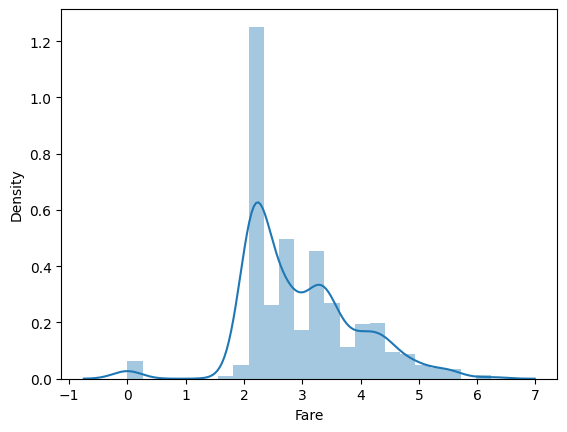

In [32]:
#plot fare again to see if the distribution looks better

sns.distplot(df['Fare'])

<Axes: >

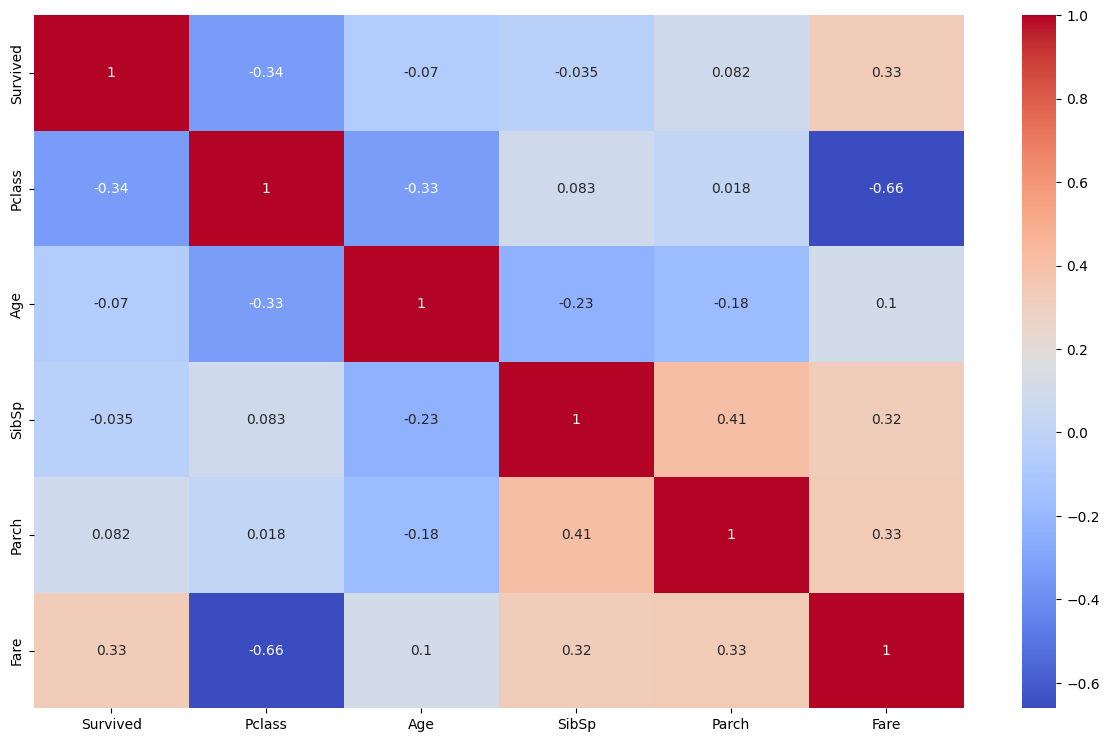

In [33]:
#check correlation between variables to see which might be important and ones that we can maybe remove

corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the correlation matrix there is a strong negative relationship between fare and the pclass. Eg. upper classes paid more. There is also a positive relationship between survival and fare paid and negative between survival and Pclass. As well as some correlation between parch and SibSp.

# Coding categorical values

In [35]:
#for categorical values we need to code to a numeric value
#features that need coding are sex and embarked as they are currently text

from sklearn.preprocessing import LabelEncoder
cols = ['Sex']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head() #check the data looks correct

#male = 1, female = 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,S
1,1,1,0,38.0,1,0,4.280593,C
2,1,3,0,26.0,0,0,2.188856,S
3,1,1,0,35.0,1,0,3.990834,S
4,0,3,1,35.0,0,0,2.202765,S


In [36]:
#as Embarked as more than 2 categories and is not ordered use one hot encoder to code variable
# subset all categorical variables which need to be encoded
categorical = ['Embarked']

for var in categorical:
    df = pd.concat([df,
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [37]:
df.head() #check the data looks correct

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,2.110213,0,0,1
1,1,1,0,38.0,1,0,4.280593,1,0,0
2,1,3,0,26.0,0,0,2.188856,0,0,1
3,1,1,0,35.0,1,0,3.990834,0,0,1
4,0,3,1,35.0,0,0,2.202765,0,0,1


# Feature engineering

In [38]:
# create Family_Size column (Parch +)
df['Family_Size'] = df['Parch'] + df['SibSp']


In [39]:
#as parch and sibsp are correlated with family size remove those
del df['Parch']
del df['SibSp']


In [40]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_Size
0,0,3,1,22.000000,2.110213,0,0,1,1
1,1,1,0,38.000000,4.280593,1,0,0,1
2,1,3,0,26.000000,2.188856,0,0,1,0
3,1,1,0,35.000000,3.990834,0,0,1,1
4,0,3,1,35.000000,2.202765,0,0,1,0
5,0,3,1,29.699118,2.246893,0,1,0,0
6,0,1,1,54.000000,3.967694,0,0,1,0
7,0,3,1,2.000000,3.094446,0,0,1,4
8,1,3,0,27.000000,2.495954,0,0,1,2
9,1,2,0,14.000000,3.436268,1,0,0,1


# separate target variable and input variables

In [42]:
# Separate target variables from input variables
# First, separate target variable from training data
# target variable is 'survived' yes or no (1 or 0)

y = df.copy()['Survived']
# Second, create a copy of original dataframe
X = df.copy()
# Remove target variable from our newly copied dataframe
X.pop('Survived')

#check the data. Same but the survived column is separated into different dataframe
n_samples, n_features = X.shape
print(n_samples, 'samples with', n_features, 'features')
X.head(10) #shows first 10 rows

891 samples with 8 features


,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_Size
0,3,1,22.000000,2.110213,0,0,1,1
1,1,0,38.000000,4.280593,1,0,0,1
2,3,0,26.000000,2.188856,0,0,1,0
3,1,0,35.000000,3.990834,0,0,1,1
4,3,1,35.000000,2.202765,0,0,1,0
5,3,1,29.699118,2.246893,0,1,0,0
6,1,1,54.000000,3.967694,0,0,1,0
7,3,1,2.000000,3.094446,0,0,1,4
8,3,0,27.000000,2.495954,0,0,1,2
9,2,0,14.000000,3.436268,1,0,0,1


In [43]:
# Also check target variable - survived
print(y.shape)
y.head(10)

(891,)


0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

# Standardisation/normalisation of data

In [44]:
from sklearn.preprocessing import StandardScaler

# Store the column names
columns = X.columns

# Create a StandardScaler object - by doing this, we can save the parameters
# we used for standardisation to get back the data in un-standardised form again.
scaler = StandardScaler()
Xnum = scaler.fit_transform(X)

# y.values gives us access to the numpy array underlying the dataframe y
# .ravel() makes it so that the values are in a 1D numpy array, which is required
# by some Scikit-learn algorithms
ynum = y.values.ravel()

# Classification models

The models are currently set to use a training dataset of 80% and 20% test data, we could change this to see if we can improve model performance. The random state value could also change the outcome based on how the data is split. If you run the models the values may change if it uses a different set of data to train and test the model with.

In [47]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Logistic regression
classifier = LogisticRegression(solver='liblinear', random_state=42)

# Create a training and testing data set if scaled data and using array
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnum, ynum, test_size= 0.2, random_state = 42)

# Create a training and testing data set #not using scaled/normalised data
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state = 42)

# Train the model
classifier.fit(Xtrain, ytrain)

#Calculate performance metrics
ypred = classifier.predict(Xtest)
print('LogisticRegression'.center(64, '='))
print(classification_report(ytest, ypred))
print('='*64)

=======================LogisticRegression=======================
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [50]:
from sklearn.tree import DecisionTreeClassifier

#decision tree model
DTclassifier = DecisionTreeClassifier(random_state=42)

# Training and getting predictions
DTclassifier.fit(Xtrain, ytrain)
DTypred = DTclassifier.predict(Xtest)
print('Decision Tree'.center(64, '='))
print(classification_report(ytest, DTypred))
print('='*64)

=========================Decision Tree==========================
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [51]:
from sklearn.ensemble import RandomForestClassifier
#random forest model
RFclassifier = RandomForestClassifier(random_state=42, oob_score = True)

# Training and getting predictions
RFclassifier.fit(Xtrain, ytrain)
RFypred = RFclassifier.predict(Xtest)
print('Decision Tree'.center(64, '='))
print(classification_report(ytest, RFypred))
print('='*64)

=========================Decision Tree==========================
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# ROC Curve

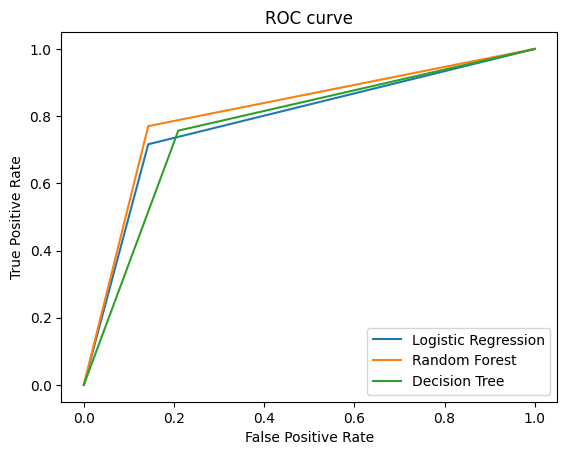

In [52]:
# A Receiver Operating Characteristic curve (ROC curve) will show a representation of the
# TP rate of the classifier against the FP rate

from sklearn.metrics import roc_curve
# Given the classifiers from above
classifier = LogisticRegression(solver='liblinear', random_state=42)
RFclassifier = RandomForestClassifier(random_state=42, oob_score = True)
DTclassifier = DecisionTreeClassifier(random_state=42)

# Training and getting predictions
classifier.fit(Xtrain, ytrain)
RF = RFclassifier.fit(Xtrain, ytrain)
DTclassifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
RFypred = RF.predict(Xtest)
DTypred = DTclassifier.predict(Xtest)

# Use the ROC metric to evaluate models performance
fp_rate, tp_rate, _ = roc_curve(ytest, ypred)
fp_rate_RF, tp_rate_RF, _ = roc_curve(ytest, RFypred)
fp_rate_DT, tp_rate_DT, _ = roc_curve(ytest, DTypred)

# Create a simple plot to visualize the curves
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fp_rate, tp_rate, label='Logistic Regression')
plt.plot(fp_rate_RF, tp_rate_RF, label='Random Forest')
plt.plot(fp_rate_DT, tp_rate_DT, label='Decision Tree')
plt.legend()


In [54]:
# Calculate the AUC (Area Under Curve) to see which one is better.
# Note that the higher AUC the better the model
from sklearn.metrics import roc_auc_score

print("AUC of Logistic Regression ROC curve: %1.2f" % roc_auc_score(ytest, ypred))
print("AUC of Random Forest ROC curve: %1.2f" % roc_auc_score(ytest, RFypred))
print("AUC of Decision Tree ROC curve: %1.2f" % roc_auc_score(ytest, DTypred))

AUC of Logistic Regression ROC curve: 0.79
AUC of Random Forest ROC curve: 0.81
AUC of Decision Tree ROC curve: 0.77


Random Forest model performs the best

# Cross validation

In [55]:
#cross validation using 5 folds cv=5 #using all training data before splitting to 80:20 train and test data
#on the random forest model

from sklearn.model_selection import cross_val_score

RFclassifier = RandomForestClassifier(random_state=42)
cv_score = cross_val_score(RFclassifier, X.values, y.values, cv=5)
print(cv_score)
print("Random Forest Average CV score: ", np.mean(cv_score))
print("Standard Deviation:", cv_score.std())

[0.76536313 0.78651685 0.84831461 0.78089888 0.83146067]
Random Forest Average CV score:  0.802510827945515
Standard Deviation: 0.03174559804615134


The model has a average accuracy of 80% with a standard deviation of 3%. The standard deviation shows us, how precise the estimates are.

This means in our case that the accuracy of our model can differ + — 3%.

In [56]:
# to run the next few scripts on the random forest data you need to convert the numpy array to a pandas DataFrame

# Convert the numpy array back to a pandas DataFrame
Xtrain_df = pd.DataFrame(Xtrain, columns=columns) #columns makes sure we have the features labelled in the dataframe once converted

Xtrain_df.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_Size
0,-1.566107,0.737695,1.215947,0.435873,-0.482043,-0.307562,0.615838,-0.560975
1,-0.369365,0.737695,-0.515526,-0.333698,-0.482043,-0.307562,0.615838,-0.560975
2,0.827377,0.737695,0.177063,-0.798540,-0.482043,-0.307562,0.615838,-0.560975
3,0.827377,0.737695,-0.284663,-0.806763,-0.482043,-0.307562,0.615838,0.059160
4,0.827377,-1.355574,-1.823750,0.528699,-0.482043,-0.307562,0.615838,3.159833


In [57]:
#using the Xtrain_DF dataframe you can run the following scripts

#check feature importance in random forest model
importances = pd.DataFrame({'feature':Xtrain_df.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Sex,0.272
Fare,0.270
Age,0.260
Family_Size,0.085
Pclass,0.078
Embarked_S,0.014
Embarked_C,0.013
Embarked_Q,0.007


<Axes: xlabel='feature'>

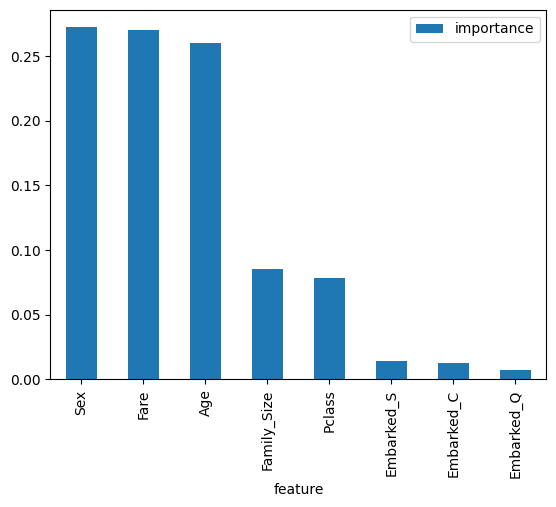

In [59]:
#plot the random forest importance
importances.plot.bar()

In Random Forest model the sex, fare and age are important in the model. Embarked doesn't seem to have much importance in the model so you could remove and re-run the model to see if improves

In [60]:
#RF out of bag score
print("oob score:", round(RF.oob_score_, 4)*100, "%")

oob score: 78.64999999999999 %


In [64]:
#confusion matrix for Random forest model #
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(RF, Xtrain, ytrain, cv=3)
confusion_matrix(ytrain, predictions)

array([[377,  67],
       [ 85, 183]])

In [65]:
#precision and recall for random forest model

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(ytrain, predictions))
print("Recall:",recall_score(ytrain, predictions))

Precision: 0.732
Recall: 0.6828358208955224


The random forest model doesn't have great recall

In [66]:
#F1 score for RF model
from sklearn.metrics import f1_score
f1_score(ytrain, predictions)

0.7065637065637067

# Neural network

#Pre-processing

In [67]:
X.head()# just to check the features

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family_Size
0,3,1,22.0,2.110213,0,0,1,1
1,1,0,38.0,4.280593,1,0,0,1
2,3,0,26.0,2.188856,0,0,1,0
3,1,0,35.0,3.990834,0,0,1,1
4,3,1,35.0,2.202765,0,0,1,0


In [68]:
#use the data that has been split between target and input variables already eg. X and y
#convert datasets to an array
Xar = X.values
Yar = y.values

Xar #look at data in array
#Yar #look at target data in array

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         1.        ,  3.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  1.        ,
         0.        ,  0.        ]])

In [69]:
#scale the input features
from sklearn import preprocessing

#function called the min_max_scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(Xar)


In [70]:
X_scale #to check what it looks like

array([[1.        , 1.        , 0.27117366, ..., 0.        , 1.        ,
        0.1       ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.        ,
        0.1       ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.        , 1.        ,
        0.3       ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 1.        , 0.        ,
        0.        ]])

In [71]:
#split the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Yar, test_size=0.2)


In [72]:
#split into validation set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [73]:
#check split of data
#the training set has 712 data points while the validation and test set has 89 data points each.
#The X variables have 8 input features, while the Y variables only has one feature to predict.

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(712, 8) (89, 8) (90, 8) (712,) (89,) (90,)


# Building NN

I have created a few different neural network models to try to improve the model.
First has 1 hidden layer and performs better than the 2 hidden layer model. Adding regularisation seems to help as well. So for the report focus on the 1 hidden layer model with regularisation. I'm just trying to get it to calculate the precision and recall for that model using the test data but it's not quite doing it correctly.

In [104]:
#set up the architecture

from keras import Sequential
from keras.layers import Activation, Dense
import keras

In [105]:
#1 hidden layer model
#In Keras, we need to specify sequential model like this
#we have only 8 input features and 1 output
#this has 1 hidden layers with 32 neurons in each layer. We can adjust these depending on how it looks
#Dense(32, activation='relu'),

model = Sequential([Dense(32, activation='relu', input_shape=(8,)),
                    Dense(1, activation='sigmoid'),
                    ])

In [106]:
#configure the model:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall

# Instantiate metrics
precision = Precision()
recall = Recall()

#Telling it which algorithm you want to use to do the optimization
#Telling it what loss function to use
#Telling it what other metrics you want to track apart from the loss function

model.compile(optimizer='sgd', #stochastic gradient descent
              loss='binary_crossentropy', #loss function for outputs that take the values 1 or 0
              metrics=['accuracy', precision, recall]) #track accuracy on top of the loss function

In [107]:
#fit = fitting the parameters to the data.
# Specify what data we are training on, which is X_train and Y_train.
#Specify size of our mini-batch and how long we want to train it for (epochs).
#Specify what our validation data is so that the model will tell us how we are doing on the validation data at each point

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
23/23 [==============================] - 1s 22ms/step - loss: 0.7363 - accuracy: 0.3160 - precision_3: 0.2735 - recall_3: 0.4852 - val_loss: 0.6910 - val_accuracy: 0.5618 - val_precision_3: 0.4848 - val_recall_3: 0.4211
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5829 - precision_3: 0.4192 - recall_3: 0.2593 - val_loss: 0.6630 - val_accuracy: 0.6180 - val_precision_3: 0.6250 - val_recall_3: 0.2632
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6595 - accuracy: 0.6433 - precision_3: 0.6000 - recall_3: 0.1778 - val_loss: 0.6466 - val_accuracy: 0.6742 - val_precision_3: 1.0000 - val_recall_3: 0.2368
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.6489 - precision_3: 0.6429 - recall_3: 0.1667 - val_loss: 0.6358 - val_accuracy: 0.6629 - val_precision_3: 1.0000 - val_recall_3: 0.2105
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.

In [108]:
#once adjusted the parameters such as epoch, batch size and number of hidden layers and neurons, evaluate with the test data

metrics = model.evaluate(X_test, Y_test)
Acc = metrics[1]
Pre = metrics[2]
Re = metrics[3]

print('Accuracy:', Acc)
print('Precision:', Pre)
print('Recall:', Re)

3/3 [==============================] - 0s 6ms/step - loss: 0.5610 - accuracy: 0.7222 - precision_3: 0.6552 - recall_3: 0.5588
Accuracy: 0.7222222089767456
Precision: 0.6551724076271057
Recall: 0.5588235259056091


In [109]:
#calcuate f1 score
F1 = 2 * (Pre * Re) / (Pre + Re)
print('F1 Score:', F1)

F1 Score: 0.6031745985191636


# Visualisation of loss and accuracy

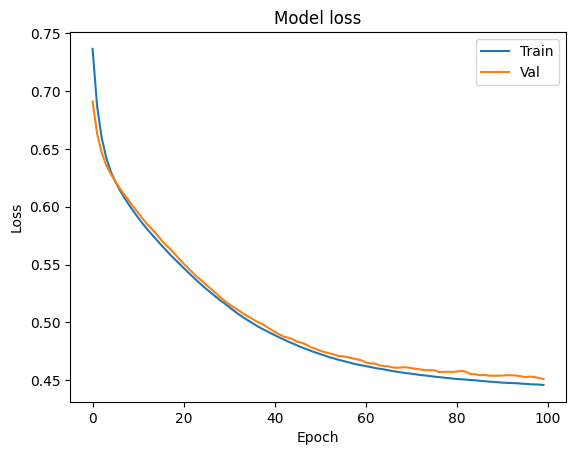

In [110]:
#check for overfitting of model

import matplotlib.pyplot as plt

#visualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

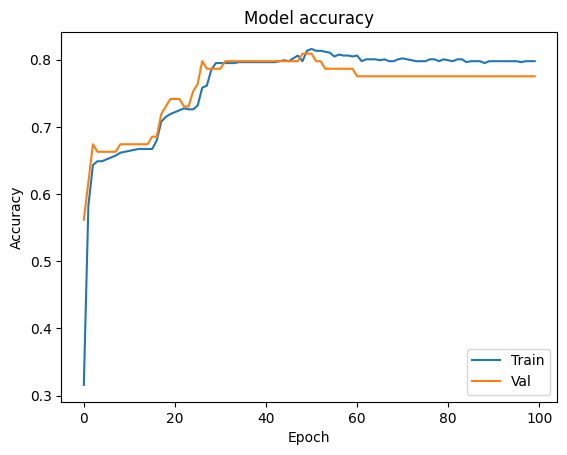

In [111]:
#visualize the training accuracy and the validation accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [114]:
## model 1 hidden layer but adding regularisation to improve fit
# add regularisation to help with overfitting model

from keras.layers import Dropout
from keras import regularizers

#Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dropout(0.3),
model2 = Sequential([Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
                      Dropout(0.3),
                    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [115]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision, recall])
hist_2 = model2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
23/23 [==============================] - 1s 19ms/step - loss: 0.7778 - accuracy: 0.6643 - precision_3: 0.6416 - recall_3: 0.3604 - val_loss: 0.7558 - val_accuracy: 0.5730 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7353 - accuracy: 0.6713 - precision_3: 0.7727 - recall_3: 0.1889 - val_loss: 0.7269 - val_accuracy: 0.5730 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.7068 - accuracy: 0.6643 - precision_3: 0.7925 - recall_3: 0.1556 - val_loss: 0.7015 - val_accuracy: 0.6517 - val_precision_3: 1.0000 - val_recall_3: 0.1842
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.7022 - precision_3: 0.8816 - recall_3: 0.2481 - val_loss: 0.6795 - val_accuracy: 0.7303 - val_precision_3: 1.0000 - val_recall_3: 0.3684
Epoch 5/100
23/23 [==============================] - 0s 5ms

In [116]:
#once adjusted the parameters such as epoch, batch size and number of hidden layers and neurons, evaluate with the test data

metrics2 = model2.evaluate(X_test, Y_test)
Acc = metrics2[1]
Pre = metrics2[2]
Re = metrics2[3]

print('Accuracy:', Acc)
print('Precision:', Pre)
print('Recall:', Re)

3/3 [==============================] - 0s 6ms/step - loss: 0.6060 - accuracy: 0.7222 - precision_3: 0.6552 - recall_3: 0.5588
Accuracy: 0.7222222089767456
Precision: 0.6551724076271057
Recall: 0.5588235259056091


In [117]:
#calcuate f1 score
F1 = 2 * (Pre * Re) / (Pre + Re)
print('F1 Score:', F1)

F1 Score: 0.6031745985191636


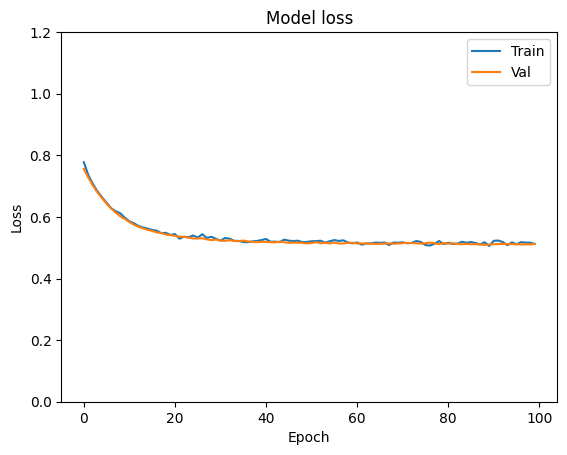

In [118]:
#plot loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

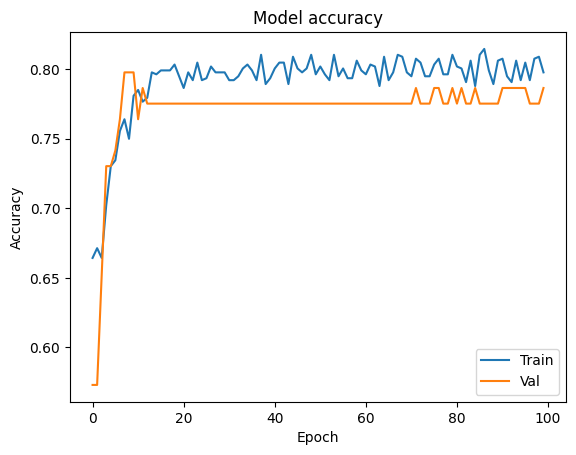

In [119]:
#plot accuracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

The model with 1 hidden layer looks good, don't need the regularisation

Try to improve model by increasing the hidden layers to 2

In [120]:
#In Keras, we need to specify sequential model like this
#we have only 8 input features and 1 output
#this has 2 hidden layers with 32 neurons in each layer. We can adjust these depending on how it looks
#Dense(32, activation='relu'),

model_2L = Sequential([Dense(32, activation='relu', input_shape=(8,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),
                    ])

In [121]:
#configure the model by:

#Telling it which algorithm you want to use to do the optimization
#Telling it what loss function to use
#Telling it what other metrics you want to track apart from the loss function

model_2L.compile(optimizer='sgd', #stochastic gradient descent
              loss='binary_crossentropy', #loss function for outputs that take the values 1 or 0
              metrics=['accuracy', precision, recall]) #track accuracy on top of the loss function

In [124]:
#fit = fitting the parameters to the data.
# Specify what data we are training on, which is X_train and Y_train.
#Specify size of our mini-batch and how long we want to train it for (epochs).
#Specify what our validation data is so that the model will tell us how we are doing on the validation data at each point

hist_2L = model_2L.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4246 - accuracy: 0.8118 - precision_3: 0.7720 - recall_3: 0.7148 - val_loss: 0.4419 - val_accuracy: 0.7978 - val_precision_3: 0.8125 - val_recall_3: 0.6842
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4245 - accuracy: 0.8118 - precision_3: 0.7857 - recall_3: 0.6926 - val_loss: 0.4408 - val_accuracy: 0.7978 - val_precision_3: 0.8125 - val_recall_3: 0.6842
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4242 - accuracy: 0.8118 - precision_3: 0.7833 - recall_3: 0.6963 - val_loss: 0.4383 - val_accuracy: 0.7978 - val_precision_3: 0.8125 - val_recall_3: 0.6842
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4240 - accuracy: 0.8132 - precision_3: 0.7819 - recall_3: 0.7037 - val_loss: 0.4385 - val_accuracy: 0.7978 - val_precision_3: 0.8125 - val_recall_3: 0.6842
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4

In [126]:
#once adjusted the parameters such as epoch, batch size and number of hidden layers and neurons, evaluate with the test data

metrics2L = model_2L.evaluate(X_test, Y_test)
Acc = metrics2L[1]
Pre = metrics2L[2]
Re = metrics2L[3]

print('Accuracy:', Acc)
print('Precision:', Pre)
print('Recall:', Re)

3/3 [==============================] - 0s 9ms/step - loss: 0.5281 - accuracy: 0.7444 - precision_3: 0.7037 - recall_3: 0.5588
Accuracy: 0.7444444298744202
Precision: 0.7037037014961243
Recall: 0.5588235259056091


In [127]:
#calcuate f1 score
F1L = 2 * (Pre * Re) / (Pre + Re)
print('F1 Score:', F1L)

F1 Score: 0.6229508166286261


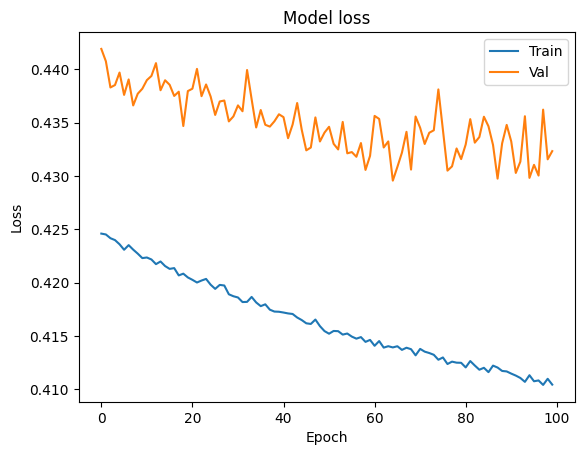

In [128]:
#check for overfitting of model

import matplotlib.pyplot as plt

#visualize the training loss and the validation loss
plt.plot(hist_2L.history['loss'])
plt.plot(hist_2L.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

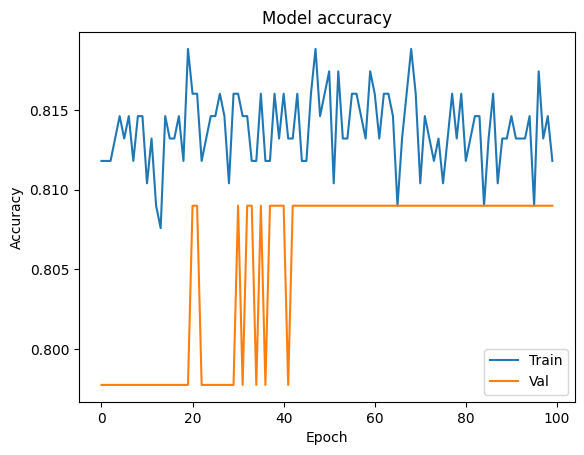

In [129]:
#visualize the training accuracy and the validation accuracy

plt.plot(hist_2L.history['accuracy'])
plt.plot(hist_2L.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [130]:
# add regularisation to help with overfitting model to the 2 hidden layer model

from keras.layers import Dropout
from keras import regularizers
#Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dropout(0.3),
model3= Sequential([Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
                      Dropout(0.3),
                    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),
                    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [132]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5130 - accuracy: 0.8062 - precision_3: 0.7750 - recall_3: 0.6889 - val_loss: 0.5104 - val_accuracy: 0.7865 - val_precision_3: 0.7879 - val_recall_3: 0.6842
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5210 - accuracy: 0.7921 - precision_3: 0.7521 - recall_3: 0.6741 - val_loss: 0.5077 - val_accuracy: 0.7753 - val_precision_3: 0.7647 - val_recall_3: 0.6842
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5123 - accuracy: 0.7935 - precision_3: 0.7450 - recall_3: 0.6926 - val_loss: 0.5079 - val_accuracy: 0.7865 - val_precision_3: 0.7879 - val_recall_3: 0.6842
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.8048 - precision_3: 0.7695 - recall_3: 0.6926 - val_loss: 0.5094 - val_accuracy: 0.7865 - val_precision_3: 0.7879 - val_recall_3: 0.6842
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5

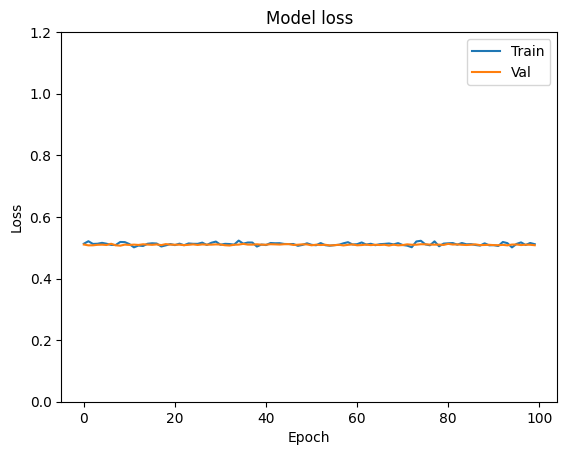

In [133]:
#plot loss
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

This doesn't look right?

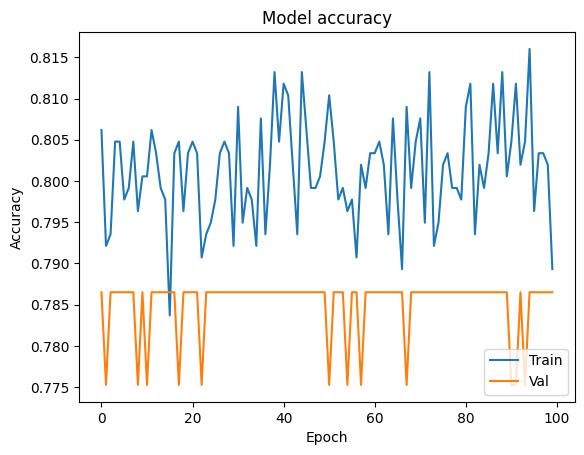

In [134]:
#plot accuracy
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

This looks worse